In [2]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
file_path = 'finalDataset0.2.xlsx' # Make sure this matches the file name exactly
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame and its info
display(df.head())
display(df.info())

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             185 non-null    int64  
 1   teaching.1           185 non-null    object 
 2   coursecontent        184 non-null    float64
 3   coursecontent.1      185 non-null    object 
 4   examination          184 non-null    float64
 5   Examination          185 non-null    object 
 6   labwork              185 non-null    int64  
 7   labwork.1            185 non-null    object 
 8   library_facilities   182 non-null    float64
 9    library_facilities  185 non-null    object 
 10  extracurricular      185 non-null    int64  
 11  extracurricular.1    185 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 17.5+ KB


None

In [3]:
# Rename the columns to be more descriptive
df.columns = ['teaching_rating', 'teaching_feedback',
              'content_rating', 'content_feedback',
              'exam_rating', 'exam_feedback',
              'lab_rating', 'lab_feedback',
              'library_rating', 'library_feedback',
              'extracurricular_rating', 'extracurricular_feedback']

# Display the first 5 rows with the new, cleaner column names
df.head()

,teaching_rating,teaching_feedback,content_rating,content_feedback,exam_rating,exam_feedback,lab_rating,lab_feedback,library_rating,library_feedback,extracurricular_rating,extracurricular_feedback
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [4]:
# Remove any rows that have missing values
df = df.dropna()

# Verify that the cleaning worked by checking the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 184
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   teaching_rating           181 non-null    int64  
 1   teaching_feedback         181 non-null    object 
 2   content_rating            181 non-null    float64
 3   content_feedback          181 non-null    object 
 4   exam_rating               181 non-null    float64
 5   exam_feedback             181 non-null    object 
 6   lab_rating                181 non-null    int64  
 7   lab_feedback              181 non-null    object 
 8   library_rating            181 non-null    float64
 9   library_feedback          181 non-null    object 
 10  extracurricular_rating    181 non-null    int64  
 11  extracurricular_feedback  181 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 18.4+ KB


In [5]:
# Install the TextBlob library
!pip install textblob

In [6]:
from textblob import TextBlob

# Create a function to get the sentiment
def get_sentiment(text):
  analysis = TextBlob(text)
  # Classify the polarity
  if analysis.sentiment.polarity > 0:
    return 'Positive'
  elif analysis.sentiment.polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'

In [7]:
# Create a new column with the sentiment of the 'teaching_feedback'
df['teaching_sentiment'] = df['teaching_feedback'].apply(get_sentiment)

# Display the original feedback and the new sentiment column for the first 5 rows
print(df[['teaching_feedback', 'teaching_sentiment']].head())

                                   teaching_feedback teaching_sentiment
0  teacher are punctual but they should also give...           Negative
1                                              Good            Positive
2  Excellent lectures are delivered by teachers a...           Positive
3                                               Good           Positive
4  teachers give us all the information required ...            Neutral


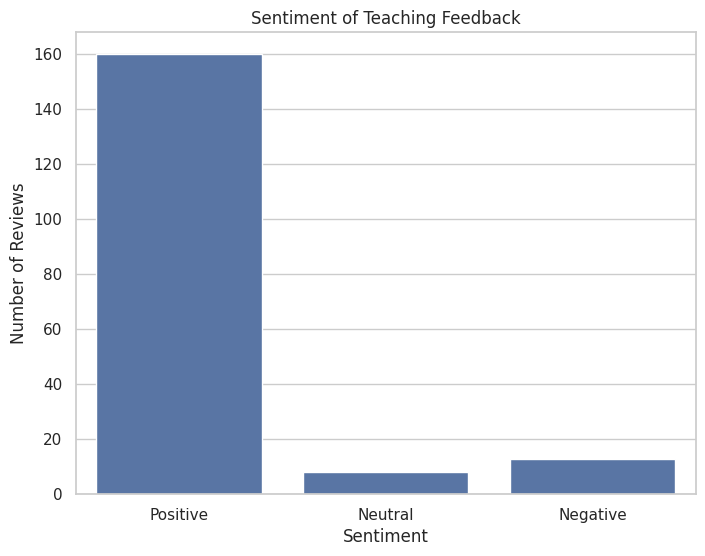

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the chart
sns.set(style='whitegrid')

# Create a bar chart of the sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(x='teaching_sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment of Teaching Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()